## PCA in Supervised Learning: 
#### Generally PCA is used in unsupervised learning, but it can be used in supervised learning. This notebook shows how to use PCA in supervised learning

Problem: You are asked to find for a given patient data, whether he has a high chance of getting Chronic Kidney Disease(CKD) or not. You are not a nephrologist., AKA kidney specialist. You only have data given to you in the form of csv file and u do not fully understand the medical terminology and have not heard the names of the columns before. Although, you are an expert in statistics. You have access to python statistical libraries. Find out if the patient has CKD or not.

In [172]:
# Importing necessary libraries

import numpy as np
import pandas as pd # install panda
import seaborn as sns # install seaborn
import matplotlib.pyplot as plt # install matplotlib
%matplotlib inline 

In [213]:
df = pd.read_csv("temp/kidney_disease.csv")
pd.set_option('display.max_columns', None)
df.head(5) # lets print 5 records

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [215]:
# I do not know what these column means. So lets see if we can make some sense of these names:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

## The columns (Thank you Opensource LLM models):
- age: Age of the patient (in years).
- bp (Blood Pressure): Blood pressure measurement (in mmHg).
- sg (Specific Gravity): A measure of urine concentration. Indicates the kidney's ability to concentrate urine. Typical values: 1.005–1.030.
- al (Albumin): The amount of albumin (a protein) in the urine. Graded on a scale: 0 (absent) to 5 (severe presence).
- su (Sugar): The amount of sugar in the urine. Graded similarly to albumin: 0 (absent) to 5 (severe presence).
- rbc (Red Blood Cells): Presence of red blood cells in the urine: normal and abnormal (indicative of bleeding or other issues).
- pc (Pus Cell): Indicates the presence of pus cells in the urine. normal or abnormal.
- pcc (Pus Cell Clumps): Indicates the presence of clumps of pus cells in the urine: present or notpresent.
- ba (Bacteria): Presence of bacteria in the urine: present or notpresent.
- bgr (Blood Glucose Random): Random blood glucose level (in mg/dL).
- bu (Blood Urea): Blood urea level (in mg/dL).
- sc (Serum Creatinine): Serum creatinine level (in mg/dL). An important marker of kidney function.
- sod (Sodium): Sodium level in the blood (in mEq/L).
- pot (Potassium): Potassium level in the blood (in mEq/L).
- hemo (Hemoglobin): Hemoglobin level in the blood (in g/dL).
- pcv (Packed Cell Volume): Volume percentage of red blood cells in the blood.
- wc (White Blood Cell Count): White blood cell count (in cells per cubic mm).
- rc (Red Blood Cell Count): Red blood cell count (in million cells per cubic mm).

It helps to know your data(AKA domain experience). But in a practical world, you will get projects from so many domains that you would not be expected to know every domain and their column. <b>So, know your statistical tools</b>

# Exploratory Data Analysis
Lets do EDA. Lets try to understand the stats on this DS.

In [181]:
df.shape # gives rows(records) and columns(features)

(400, 26)

So there are 400 records/instances. There are 26 columns aka features

In [182]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [183]:
df = df.drop(['id'],axis=1) # do not really need this
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


## Any duplicates ??
If found , you should drop them.

In [184]:
# find duplicate rows
duplicate_rows = df.duplicated()
print(duplicate_rows)

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool


## GOOD no duplicate rows


## Allright ...few columns are categorical in nature.
PCA is primarily used in numerical data. So lets keep numerical data and drop categorical data. 
- We are losing some information here by dropping categorical data...only test will show if this was a good idea.
  

In [185]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

print("total columns that are numeric =",numeric_data.shape[1])
print("numeric columns=", numeric_data.columns)
print("total columns that are category",categorical_data.shape[1])
print("category columns=", categorical_data.columns)
df = df.drop(['rbc', 'pc', 'pcc', 'ba', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', ], axis=1) # pcv is numeric


total columns that are numeric = 11
numeric columns= Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo'], dtype='object')
total columns that are category 14
category columns= Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [171]:
# y = df['classification'] # target/dependant variable
# X = df.drop(['classification'],axis=1) #independant


In [186]:
df.isnull().sum() # check if there are any null/missing values and show there total sum

age                9
bp                12
sg                47
al                46
su                49
bgr               44
bu                19
sc                17
sod               87
pot               88
hemo              52
pcv               70
classification     0
dtype: int64

 So we see that there are missing values.
 
 In case there are missing values:df.dropna(), df.fillna(value_here), or  df['A'] = df['A'].fillna(df['A'].mean()), KNN, etc

In [189]:
from sklearn.impute import KNNImputer
# Apply KNN imputation only to the numeric columns
imputer = KNNImputer(n_neighbors=3)
X = pd.DataFrame(imputer.fit_transform(df[numeric_data.columns]), columns=numeric_data.columns)
y = df['classification']

df = pd.concat([X,y], axis=1)
df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
classification    0
dtype: int64

## standardize the values


In [192]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df[numeric_data.columns])
X = pd.DataFrame(X_std, columns=numeric_data.columns)

df = pd.concat([X,y], axis=1)
df

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,classification
0,-0.180904,0.275545,0.502300,-0.033462,-0.439297,-0.360692,-0.438785,-0.335644,0.429615,-0.119745,1.003909,ckd
1,-2.561348,-1.928816,0.502300,2.283150,-0.439297,-0.299893,-0.800047,-0.405056,-0.000493,-0.225949,-0.465401,ckd
2,0.631930,0.275545,-1.318728,0.738742,2.394878,3.573898,-0.097593,-0.231525,-0.251389,-0.119745,-1.074627,ckd
3,-0.180904,-0.459242,-2.229243,2.283150,-0.439297,-0.412806,-0.037382,0.115535,-2.867880,-0.733367,-0.501238,ckd
4,-0.006725,0.275545,-1.318728,0.738742,-0.439297,-0.556119,-0.639486,-0.300938,0.178719,-0.119745,-0.357890,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.225513,0.275545,0.502300,-0.805666,-0.439297,-0.113152,-0.177873,-0.457115,1.325674,0.116264,1.111419,notckd
396,-0.529262,-0.459242,1.412815,-0.805666,-0.439297,-0.960001,-0.539136,-0.335644,0.357931,-0.379354,1.398113,notckd
397,-2.271050,0.275545,0.502300,-0.805666,-0.439297,-0.634290,-0.639486,-0.439762,-0.072178,-0.060743,1.147256,notckd
398,-1.980752,-1.194029,1.412815,-0.805666,-0.439297,-0.451892,-0.157803,-0.370350,-0.287232,0.116264,0.573867,notckd


In [212]:
# optional ...lets explore the dataset little more to get familiar with the tools available 
# How much information gain is in each feature.
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information ( AKA measure of information gain)
mutual_info = mutual_info_classif(X, y)

# Lets show the results
mutual_info_results = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info
})

# Sort by mutual information to see which feature explains the most
print(mutual_info_results.sort_values(by='Mutual Information', ascending=False))


   Feature  Mutual Information
2       sg            0.384260
10    hemo            0.381387
7       sc            0.357060
3       al            0.323601
6       bu            0.179750
8      sod            0.170949
9      pot            0.160311
5      bgr            0.147497
1       bp            0.100006
4       su            0.092751
0      age            0.055280


# Interpret above
This is where domain experience can help you become little comfortable with data.

- Above displays which features(from X) contribute the most information about the target(y).
- sg (Specific Gravity) that measure of urine concentrtion. (Indicates the kidney's ability to concentrate urine.)
- hemo (Hemoglobin) hemoglobin level in the blood (in g/dL).
- sc (Serum Creatinine) level (in mg/dL). <b> An important marker of kidney function.</b>

<Axes: >

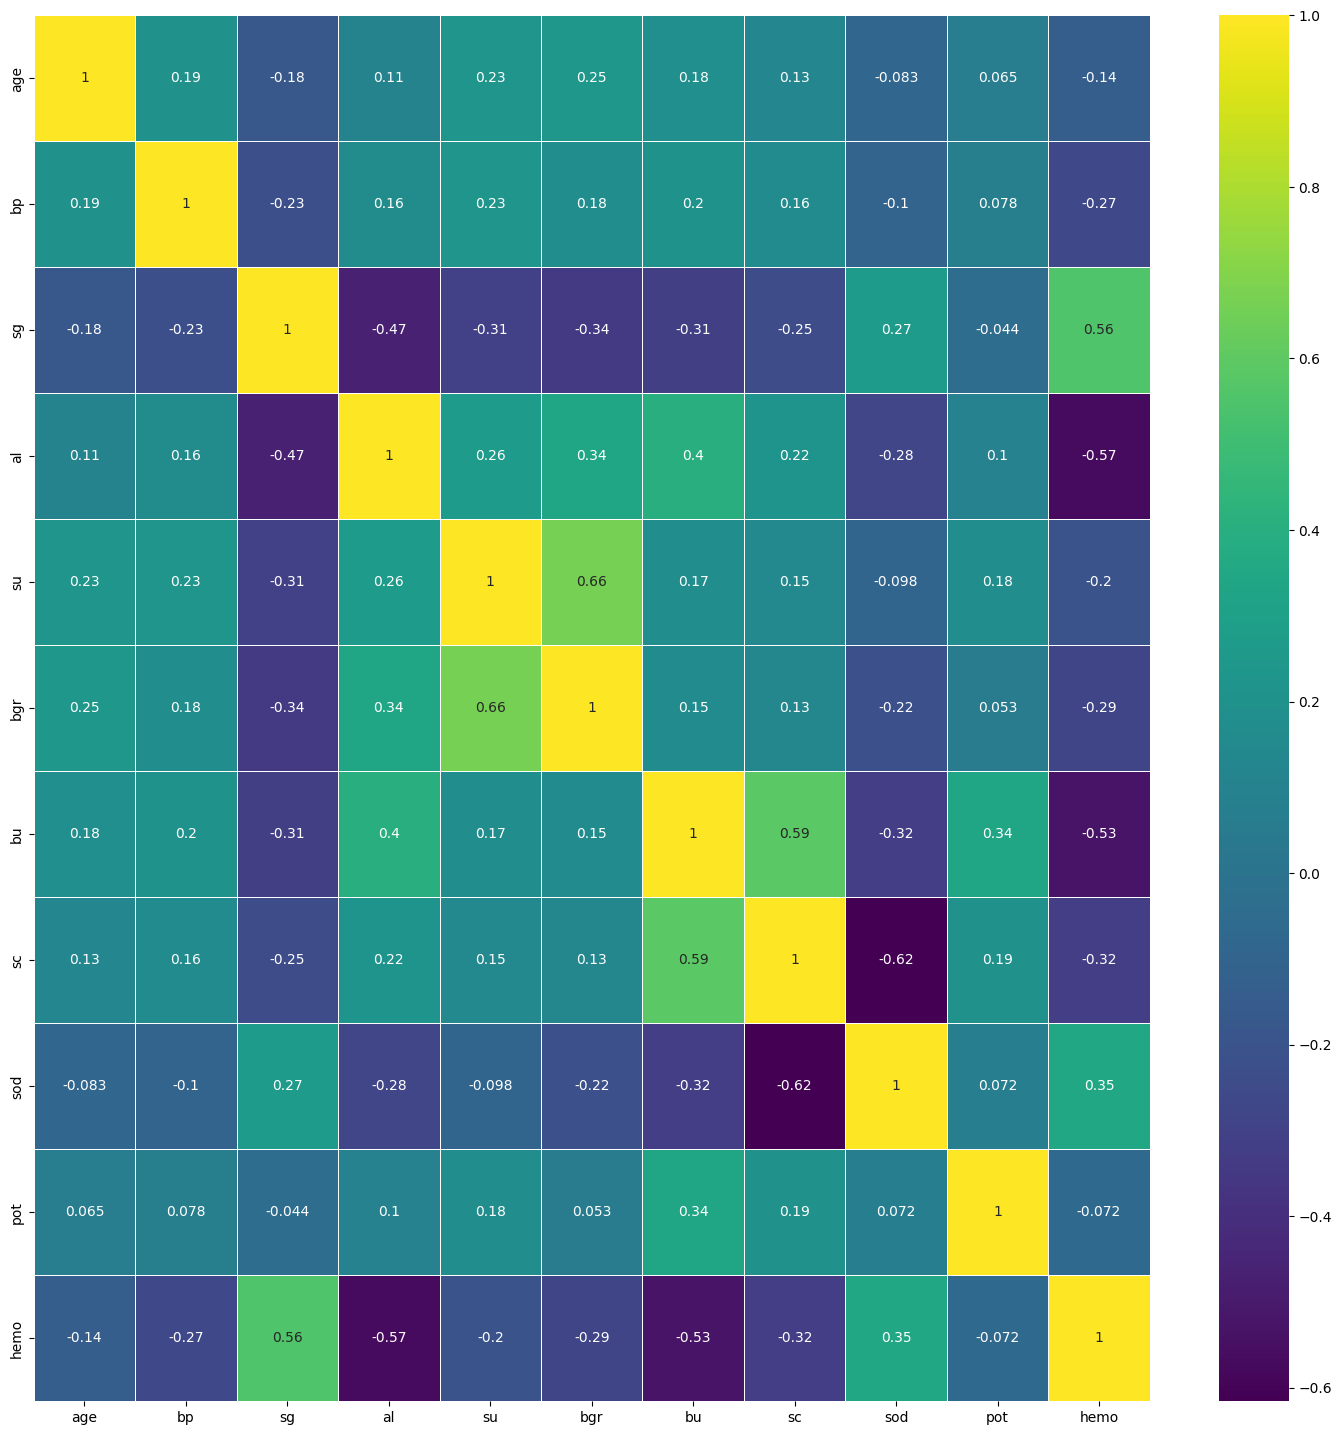

In [195]:
# We can do two things - we have 23 columns now including our target variable
# Either we use the whole data or just take some part of it which is the most important 
# for our model to help in prediction.

plt.figure(figsize=(18, 18)) # width = 18, ht=18
sns.heatmap(X.corr(), # pairwise correlation between the numerical columns. -1 to +1 
            annot=True,
            cmap='viridis',
            linewidths=.5
)

## Observation
So we see a correlation value is in the range of (1 to - 0.6) exculding the 1s.
For removing some of the columns so that our dataset is smaller in dimesion and yet still holds most of the information, we can remove the highly
correlated columns. 
- we can remove su or bgr
and so on...

## OR

A better way is to use PCA, which calculates linear combinations of your variables in such way that they get "summarized" in fewer variables.


In [198]:
from sklearn.decomposition import PCA

pca1  = PCA(n_components=1)
pca2  = PCA(n_components=2)
pca5  = PCA(n_components = 5)
pca7 = PCA(n_components = 7)
pca10 = PCA(n_components = 10)

# Lets take 2, 7 and 15 PC's
pca_fit1 = pca1.fit_transform(X)
pca_fit2 = pca2.fit_transform(X)
pca_fit5 = pca5.fit_transform(X)
pca_fit7 = pca7.fit_transform(X)
pca_fit10 = pca10.fit_transform(X)


In [202]:
## pca1 : lets work with only 1 PC

In [203]:
# You can use both of the reduced dataset to see how much accuracy or predictive power of the model is affected.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(pca_fit1, y, test_size=0.2, random_state = 42)
RFC_model = RandomForestClassifier(n_estimators=100, n_jobs = -1)

#Fit
RFC_model.fit(Xtrain, ytrain)

#make prediction
y_pred = RFC_model.predict(Xtest)

#Checking the accuracy on training dataset.
RFC_accuracy_train = round(RFC_model.score(Xtrain, ytrain)*100,2)
print("RFC_accuracy_train=",round(RFC_accuracy_train, 2), '%')

RFC_accuracy_train= 100.0 %


### WOOOWWW
100% accuracy...this should elate you and scare you. The model may be overfiting. Lets try to see how it does on test dataset.

In [201]:
RFC_accuracy_test = round(RFC_model.score(Xtest, ytest)*100,2)
print("RFC_accuracy_test=",round(RFC_accuracy_test, 2), '%')

RFC_accuracy_test= 92.5 %


OK...not bad

## pca2 : 2 principal components analysis

In [115]:
# You can use both of the reduced dataset to see how much accuracy or predictive power of the model is affected.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(pca_fit2, y, test_size=0.2, random_state = 42)
RFC_model = RandomForestClassifier(n_estimators=100, n_jobs = -1)

#Fit
RFC_model.fit(Xtrain, ytrain)

#make prediction
y_pred = RFC_model.predict(Xtest)

#Checking the accuracy on training dataset.
RFC_accuracy_train = round(RFC_model.score(Xtrain, ytrain)*100,2)
print("RFC_accuracy_train=",round(RFC_accuracy_train, 2), '%')

RFC_accuracy_train= 100.0 %


In [116]:
RFC_accuracy_test = round(RFC_model.score(Xtest, ytest)*100,2)
print("RFC_accuracy_test=",round(RFC_accuracy_test, 2), '%')

RFC_accuracy_test= 95.0 %


### All is good
Getting good accuracy on test dataset. 

 ## pca5 : 5 Principal components analysis

In [204]:
# You can use both of the reduced dataset to see how much accuracy or predictive power of the model is affected.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(pca_fit5, y, test_size=0.2, random_state = 42)
RFC_model = RandomForestClassifier(n_estimators=100, n_jobs = -1)

#Fit
RFC_model.fit(Xtrain, ytrain)

#make prediction
y_pred = RFC_model.predict(Xtest)

#Checking the accuracy on training dataset.
RFC_accuracy_train = round(RFC_model.score(Xtrain, ytrain)*100,2)
print("RFC_accuracy_train=",round(RFC_accuracy_train, 2), '%')

RFC_accuracy_test = round(RFC_model.score(Xtest, ytest)*100,2)
print("RFC_accuracy_test=",round(RFC_accuracy_test, 2), '%')

RFC_accuracy_train= 100.0 %
RFC_accuracy_test= 95.0 %


#### Interesting....increasing PC from 2 to 5 did no good ...

 ## pca7 : 7 Principal components analysis

In [206]:
# You can use both of the reduced dataset to see how much accuracy or predictive power of the model is affected.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(pca_fit7, y, test_size=0.2, random_state = 42)
RFC_model = RandomForestClassifier(n_estimators=300, n_jobs = -1)

#Fit
RFC_model.fit(Xtrain, ytrain)

#make prediction
y_pred = RFC_model.predict(Xtest)

#Checking the accuracy on training dataset.
RFC_accuracy_train = round(RFC_model.score(Xtrain, ytrain)*100,2)
print("RFC_accuracy_train=",round(RFC_accuracy_train, 2), '%')

RFC_accuracy_test = round(RFC_model.score(Xtest, ytest)*100,2)
print("RFC_accuracy_test=",round(RFC_accuracy_test, 2), '%')

RFC_accuracy_train= 100.0 %
RFC_accuracy_test= 95.0 %


## save the model and the PCA
- Do not have to retrain in production
- can be resused later
- can also be shared with others.

In [211]:
# Save the trained model as a pickle string. 
# This way do not have retrain the model in production. Saves time and resources
import pickle 

saved_model = pickle.dump(RFC_model, open('KidneyDisease.pickle','wb'))# write in binary format
saved_pca = pickle.dump(pca2, open('KidneyDiseasePCA2.pickle','wb')) # would save time in future

# Optional
Lets see how much variance is being explained by increasing number of PC. 

In [208]:

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Fit PCA (for example, let's use 5 components)
pca = PCA(n_components=5)
pca.fit(scaled_X)

# Get the components (loadings) of the PCA
components = pca.components_

# Create a DataFrame to better understand the contribution of each feature to each component
components_X = pd.DataFrame(components, columns=X.columns)

# You can also get the explained variance for each component
explained_variance = pca.explained_variance_ratio_

print("Explained Variance Ratio of each component:")
print(explained_variance)

Explained Variance Ratio of each component:
[0.32976543 0.13791758 0.10745653 0.09390588 0.08584546]


### Visualize above
Lets use number of components as 2, 5, 7

explained_variance: [0.32976543 0.13791758 0.10745653 0.09390588 0.08584546]


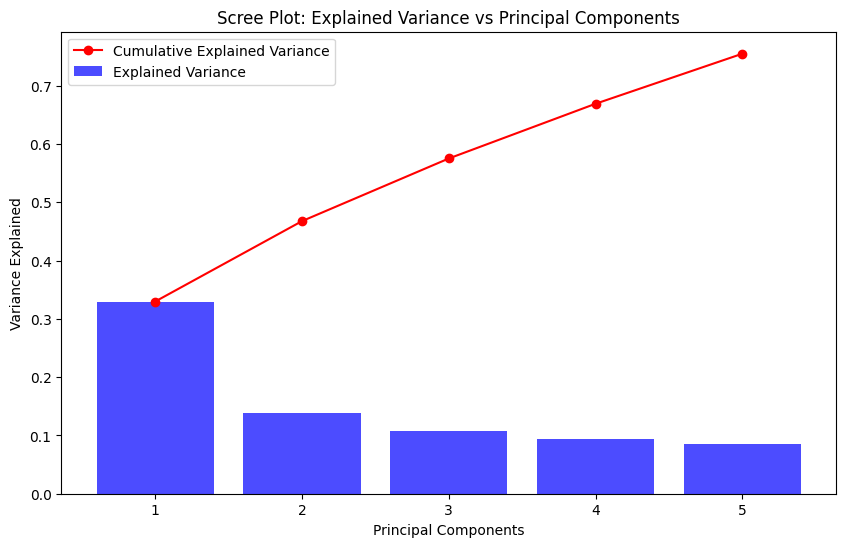

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame with numerical values
# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Fit PCA (let's use 2 components for this example)
pca = PCA(n_components=5) # TODO change this from 2,5, 7, 15,20
pca.fit(scaled_X)

# Create a DataFrame for the PCA components (loadings)
components_X = pd.DataFrame(pca.components_, columns=X.columns)

# Plot the Explained Variance Ratio (Scree Plot)
explained_variance = pca.explained_variance_ratio_
print(f"explained_variance: {explained_variance}")

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7, color='b', label='Explained Variance')
plt.plot(range(1, len(explained_variance)+1), np.cumsum(explained_variance), marker='o', color='r', label='Cumulative Explained Variance')
plt.title('Scree Plot: Explained Variance vs Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.legend()
plt.show()


## Thoughts
- We dropped categorical data....so there was loss of infor.....BUT, the columns that were dropped did not seem to be important factor in making prediction of CKD.
- We only had 400 data points, and quite a few of them were missing values. Experiment by filling missing values with some other and test if accuracy goes up.
- Target Ignorance: PCA does not consider the target variable (y). As a result, it might discard components that are unimportant for variance but critical for predicting the target.

##### PCA is primarily used in unsupervised learning. Here I used PCA in supervised learning and showed how it can be useful

### Key benefits of using PCA in supervised learning (prediction models):
- **Dimensionality reduction**: PCA transforms a high-dimensional dataset into a lower-dimensional space while retaining most of the relevant information, making it easier for models to learn patterns and reducing the "curse of dimensionality".
- **Overfitting prevention**: By selecting the most important features, PCA can help prevent overfitting, where a model learns the training data too closely and performs poorly on new data. 
- **Noise reduction**: PCA can help remove noise from data by focusing on the major patterns and reducing the influence of irrelevant variations. 
- **Multicollinearity handling**: When multiple features are highly correlated, PCA can create new, uncorrelated features, addressing the issue of multicollinearity which can negatively impact model performance. 
- **Computational efficiency**: By reducing the number of features, PCA can speed up the training process of machine learning models. 